In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path_1 = r'C:\Users\KAIM\Downloads\Dataset_1.xlsx'

In [3]:
dataset = pd.read_excel(file_path_1)
print(dataset.head())

   timestamp       uid  campaign  conversion  conversion_timestamp  \
0          0  20073966  22589171           0                    -1   
1          2  24607497    884761           0                    -1   
2          2  28474333  18975823           0                    -1   
3          3   7306395  29427842           1               1449193   
4          3  25357769  13365547           0                    -1   

   conversion_id  attribution  click  click_pos  click_nb  ...  \
0             -1            0      0         -1        -1  ...   
1             -1            0      0         -1        -1  ...   
2             -1            0      0         -1        -1  ...   
3        3063962            0      1          0         7  ...   
4             -1            0      0         -1        -1  ...   

   time_since_last_click      cat1      cat2      cat3      cat4      cat5  \
0                     -1   5824233   9312274   3490278  29196072  11409686   
1                 423858  

In [4]:
dataset = dataset.sample(frac=0.1, random_state=1)  #10%

In [5]:
import pandas as pd

cat_columns = ['click', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'campaign' ]


new_cols = [col for col in cat_columns if col in dataset.columns]


if new_cols:
    dataset = pd.get_dummies(dataset, columns=new_cols, drop_first=True)


print(dataset.head())

         timestamp       uid  conversion  conversion_timestamp  conversion_id  \
1045953     159092   6869023           0                    -1             -1   
358409       59384  23224919           0                    -1             -1   
875012      140734  18403799           0                    -1             -1   
555046       81046  31314136           0                    -1             -1   
272972       50195   4466956           0                    -1             -1   

         attribution  click_pos  click_nb      cost       cpo  ...  \
1045953            0         -1        -1  0.000027  0.283853  ...   
358409             0         -1        -1  0.000269  0.285435  ...   
875012             0         -1        -1  0.000010  0.340921  ...   
555046             0         -1        -1  0.000031  0.184848  ...   
272972             0         -1        -1  0.000016  0.221639  ...   

         campaign_32321347  campaign_32323516  campaign_32368241  \
1045953              Fal

In [6]:
y = dataset['attribution']  
X = dataset.drop(columns=['attribution', 'timestamp', 'uid', 'conversion', 'conversion_timestamp', 'conversion_id'])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score            
from sklearn.metrics import mean_squared_error   
from sklearn.metrics import classification_report, accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20395
           1       0.58      0.37      0.45       577

    accuracy                           0.98     20972
   macro avg       0.78      0.68      0.72     20972
weighted avg       0.97      0.98      0.97     20972



In [9]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


feature_names = X.columns  
coefficients = pd.DataFrame(model.coef_.flatten(), index=feature_names, columns=['Coefficient'])
print(coefficients)

Coefficients: [[ 3.26665830e-01  3.30367048e-01 -7.79880034e-05 ... -5.23727189e-05
  -1.82350332e-04 -2.46604116e-03]]
Intercept: [-0.32983587]
                       Coefficient
click_pos                 0.326666
click_nb                  0.330367
cost                     -0.000078
cpo                      -0.063697
time_since_last_click    -0.000003
...                            ...
campaign_32398755        -0.000698
campaign_32398758        -0.000176
campaign_32405311        -0.000052
campaign_32452108        -0.000182
campaign_32452111        -0.002466

[10650 rows x 1 columns]


In [14]:
import matplotlib.pyplot as plt

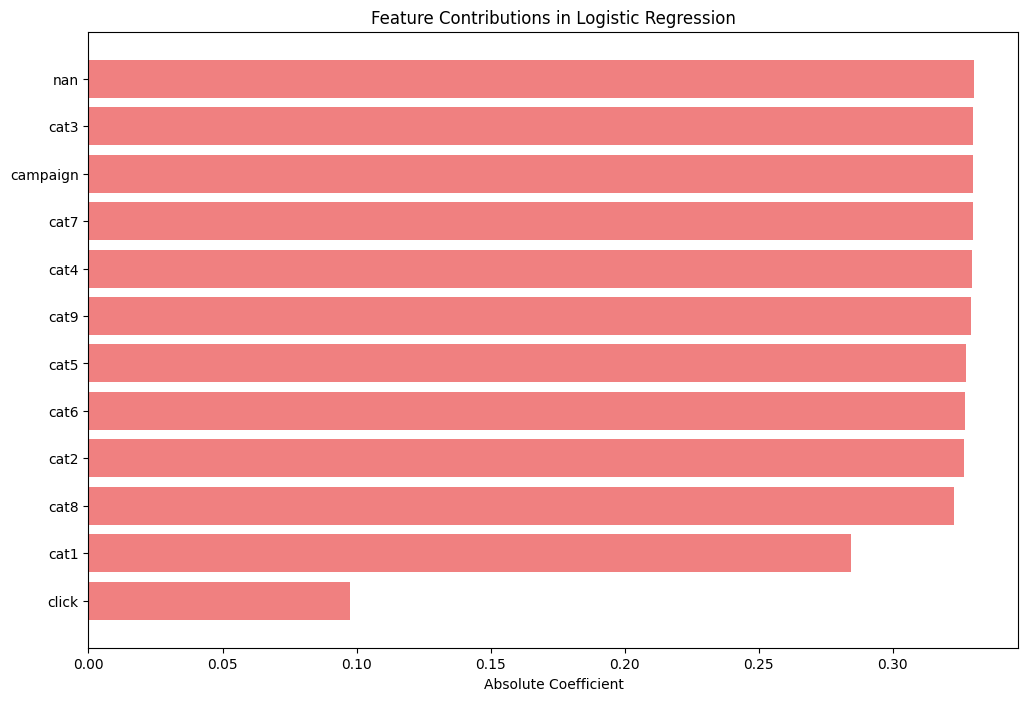

In [15]:

coefficients_df = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])


num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [col for col in X.columns if col not in num_cols]


num_coefficients = coefficients_df.loc[num_cols].copy()
num_coefficients['Absolute Coefficient'] = num_coefficients['Coefficient'].abs()


cat_coefficients = coefficients_df.loc[cat_cols]
cat_coefficients['Original Feature'] = cat_coefficients.index.str.split('_', n=1).str[0]  # 提取原始特征名


cat_coefficients_grouped = cat_coefficients.groupby('Original Feature')['Coefficient'].sum().abs().reset_index()


combined_coefficients = pd.concat(
    [num_coefficients[['Absolute Coefficient']], 
     cat_coefficients_grouped.rename(columns={'Coefficient': 'Absolute Coefficient'})], 
    ignore_index=True
)


combined_coefficients = combined_coefficients.sort_values(by='Absolute Coefficient', ascending=False)


plt.figure(figsize=(12, 8))
plt.barh(combined_coefficients['Original Feature'].astype(str), combined_coefficients['Absolute Coefficient'], color='lightcoral')
plt.xlabel('Absolute Coefficient')
plt.title('Feature Contributions in Logistic Regression')
plt.gca().invert_yaxis()  
plt.show()


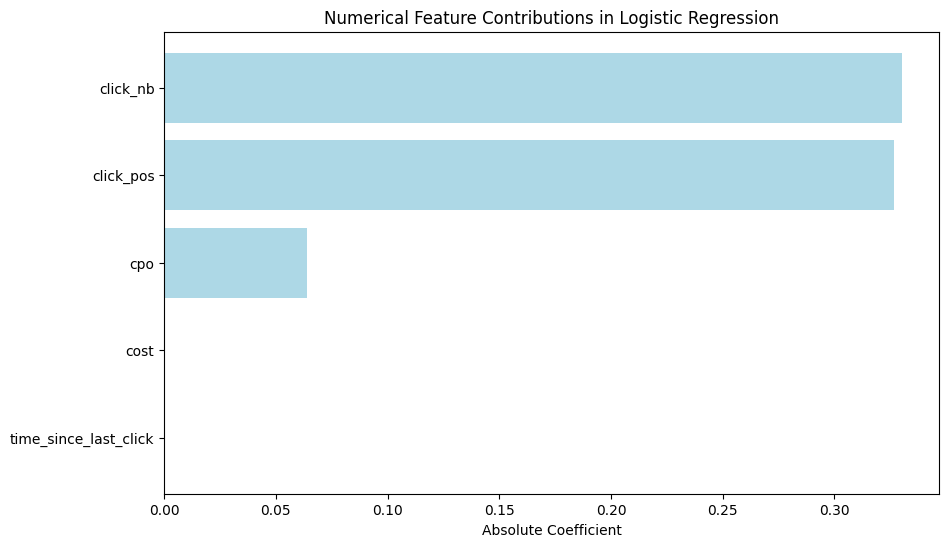

In [16]:
coefficients_df = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])


num_cols = X.select_dtypes(include=[np.number]).columns.tolist()


num_coefficients = coefficients_df.loc[num_cols].copy()
num_coefficients['Absolute Coefficient'] = num_coefficients['Coefficient'].abs()


num_coefficients_sorted = num_coefficients.sort_values(by='Absolute Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(num_coefficients_sorted.index, num_coefficients_sorted['Absolute Coefficient'], color='lightblue')
plt.xlabel('Absolute Coefficient')
plt.title('Numerical Feature Contributions in Logistic Regression')
plt.gca().invert_yaxis()  # 反转y轴以显示最大贡献在上
plt.show()
